In [1]:
import pandas as pd 
import datetime as dt 
import numpy as np
import time
import math
import matplotlib
import matplotlib.pyplot as plt


In [2]:
df_adjacent = pd.read_csv('adjacent_zone.csv')
def get_adjacent_zone(df, taxi_zone):
    adj_zone_1 = df.loc[df["zone1"]==taxi_zone, "zone2"].values.tolist()
    adj_zone_2 = df.loc[df["zone2"]==taxi_zone, "zone1"].values.tolist()
    adj_zone_list = list(filter(None, adj_zone_1+adj_zone_2))
    return(adj_zone_list)

In [3]:
adj_zones = []
for i in range(1,264):
    adj_zones.append(get_adjacent_zone(df_adjacent, i))
adj_zones 
def get_adjacent(zone):
    return adj_zones[zone-1]

In [4]:
get_adjacent_zone(df_adjacent, 3)

[32, 51, 81, 184, 185, 242, 254]

In [5]:
for i in range(1,264):
    print(get_adjacent(zone = i))

[]
[30, 132]
[32, 51, 81, 184, 185, 242, 254]
[79, 148, 224, 232]
[84, 99, 204]
[115, 118, 214, 221]
[146, 179, 193, 207, 223, 226, 260]
[179, 223]
[16, 73, 98, 121, 171, 192]
[205, 215, 216, 218, 219]
[14, 22, 67]
[13, 88, 261]
[231, 261, 12]
[67, 227, 228, 11]
[16, 171, 252]
[64, 98, 171, 175, 9, 15]
[37, 49, 61, 80, 217, 225]
[20, 94, 136, 174, 241]
[64, 101, 175, 191]
[31, 47, 78, 94, 174, 18]
[22, 26, 108, 123, 178]
[26, 67, 11, 21]
[99, 118, 156, 187, 251]
[41, 43, 151, 166]
[33, 40, 52, 65, 97, 106, 181]
[67, 89, 111, 133, 178, 227, 21, 22]
[201]
[93, 121, 130, 131, 134, 135, 197]
[55, 108, 123, 150, 210]
[2]
[32, 78, 174, 185, 240, 242, 254, 20]
[185, 254, 3, 31]
[52, 54, 65, 66, 25]
[49, 66, 97, 217, 256]
[61, 72, 76, 77, 177]
[37, 80, 96, 198]
[63, 80, 96, 177, 225, 17, 36]
[139, 191, 203, 205]
[72, 76, 91, 155, 222]
[52, 54, 106, 195, 228, 25]
[42, 43, 74, 75, 152, 166, 24]
[74, 116, 120, 152, 166, 41]
[75, 142, 151, 163, 236, 237, 238, 239, 24, 41]
[84, 99, 204]
[144, 148, 

In [6]:
df = pd.read_csv('pickup_dropoff_summary.csv')
df

,Unnamed: 0,zone,time_window,weekday_pickup,weekend_pickup,weekday_dropoff,weekend_dropoff,weekday_differentials,weekend_differentials,supply_surplus_weekday,supply_surplus_weekend,zone_name,zone_borough,time_start,time_end
0,0,1,1,1,0,8,1,7,1,True,True,Newark Airport,EWR,12:00:00 AM,12:30:00 AM
1,1,1,2,3,0,13,6,10,6,True,True,Newark Airport,EWR,12:30:00 AM,1:00:00 AM
2,2,1,3,0,0,13,2,13,2,True,True,Newark Airport,EWR,1:00:00 AM,1:30:00 AM
3,3,1,4,1,0,12,3,11,3,True,True,Newark Airport,EWR,1:30:00 AM,2:00:00 AM
4,4,1,5,1,0,9,5,8,5,True,True,Newark Airport,EWR,2:00:00 AM,2:30:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,12619,263,44,4569,2086,7152,2371,2583,285,True,True,Yorkville West,Manhattan,9:30:00 PM,10:00:00 PM
12620,12620,263,45,4554,1986,7225,2532,2671,546,True,True,Yorkville West,Manhattan,10:00:00 PM,10:30:00 PM
12621,12621,263,46,3902,1919,6695,2495,2793,576,True,True,Yorkville West,Manhattan,10:30:00 PM,11:00:00 PM
12622,12622,263,47,3528,2046,6361,2579,2833,533,True,True,Yorkville West,Manhattan,11:00:00 PM,11:30:00 PM


In [151]:
temp  = df.iloc[12623]
time = temp['time_window']
print(time)
zone = temp['zone']
adj =  get_adjacent(zone)
print(adj)
lamb = temp['weekday_dropoff']
print(lamb)
for adj_zone in adj:
    row = df.loc[ (df['time_window'] == time) & (df['zone'] == adj_zone) ]
    lamb = lamb + row['weekday_dropoff'].values[0]
print(lamb)

    


48
[75, 140, 141, 236, 262]
5397
24471


In [7]:
#total dropoffs of a zone and its adjacent zones 
def total_adjacent_dropoff_weekday(row):
    time = row['time_window']
   # print(time)
    zone = row['zone']
   # print(zone)
    adj =  get_adjacent(zone)
    lamb = row['weekday_dropoff']
    for adj_zone in adj:
        adj_row = df.loc[ (df['time_window'] == time) & (df['zone'] == adj_zone) ]
        lamb = lamb + adj_row['weekday_dropoff'].values[0]
    return lamb


def total_adjacent_dropoff_weekend(row):
    time = row['time_window']
   # print(time)
    zone = row['zone']
   # print(zone)
    adj =  get_adjacent(zone)
    lamb = row['weekend_dropoff']
    for adj_zone in adj:
        adj_row = df.loc[ (df['time_window'] == time) & (df['zone'] == adj_zone) ]
        lamb = lamb + adj_row['weekend_dropoff'].values[0]
    return lamb


In [8]:
start_time = time.time()

df['total_dropoff_adjacent_weekday'] = df.apply(total_adjacent_dropoff_weekday, axis=1)
df['total_dropoff_adjacent_weekend'] = df.apply(total_adjacent_dropoff_weekend, axis=1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 93.31304335594177 seconds ---


In [14]:
def prob_no_taxi_weekday(row): 
    return math.exp( -row['total_dropoff_adjacent_weekday']/(30*  max(1, len(get_adjacent(zone = row['zone']))) ) )

def prob_no_taxi_weekend(row): 
    return math.exp( -row['total_dropoff_adjacent_weekend']/(30*  max(1, len(get_adjacent(zone = row['zone']))) ) )

In [15]:
df['prob_no_taxi_available_weekday'] = df.apply(prob_no_taxi_weekday, axis=1)
df['prob_no_taxi_available_weekend'] = df.apply(prob_no_taxi_weekend, axis=1)

In [16]:
prob = df[['zone', 'time_window', 'total_dropoff_adjacent_weekday', 'prob_no_taxi_available_weekday', 
           'total_dropoff_adjacent_weekend', 'prob_no_taxi_available_weekend']]

In [22]:
prob.to_csv('prob_no_taxi_available.csv')

[7.65928338e-01 6.48344341e-01 6.48344341e-01 6.70320046e-01
 7.40818221e-01 6.70320046e-01 4.64559020e-01 1.44665177e-01
 2.73237224e-02 1.78070088e-04 1.67449321e-06 4.90341795e-09
 2.19755947e-08 1.51906597e-07 6.16011626e-07 4.24719514e-05
 7.73889412e-05 2.94347875e-05 3.84302109e-05 1.51123238e-05
 1.41376845e-05 2.95109776e-06 1.23729243e-05 1.56650009e-06
 9.79798963e-06 6.80798134e-07 1.67449321e-06 3.17089562e-08
 2.12551490e-08 3.17910328e-09 9.60006008e-11 4.45979450e-11
 8.95773672e-10 5.21442584e-07 5.55951324e-06 7.23978950e-05
 7.00244097e-05 6.12834951e-05 5.01746821e-05 3.83309935e-04
 8.22974705e-03 2.73237224e-02 8.20849986e-02 2.15815083e-01
 4.64559020e-01 5.67413669e-01 5.48811636e-01 6.27089085e-01]
[9.67216100e-01 8.18730753e-01 9.35506985e-01 9.04837418e-01
 8.46481725e-01 7.40818221e-01 7.65928338e-01 4.49328964e-01
 1.59879746e-01 5.32193443e-02 9.72229737e-03 2.39748901e-03
 2.02943064e-03 1.19055781e-03 5.53084370e-04 3.69786372e-03
 3.34596546e-03 2.73944

NameError: name 'zone' is not defined

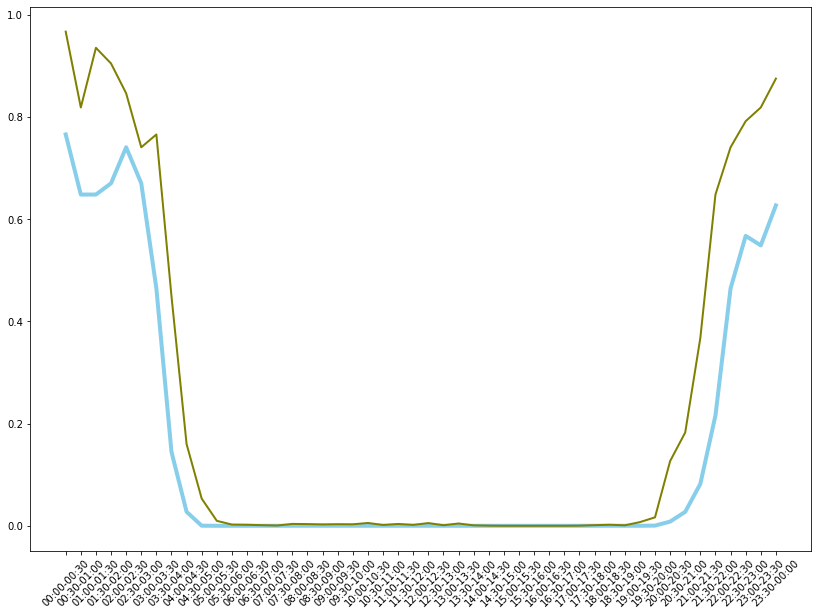

In [18]:
labels = ['00:00-00:30', '00:30-01:00', '01:00-01:30', '01:30-02:00',
                  '02:00-02:30', '02:30-03:00', '03:00-03:30', '03:30-04:00',
                  '04:00-04:30', '04:30-05:00', '05:00-05:30', '05:30-06:00',
                  '06:00-06:30', '06:30-07:00', '07:00-07:30', '07:30-08:00', 
                  '08:00-08:30', '08:30-09:00', '09:00-09:30', '09:30-10:00',
                  '10:00-10:30', '10:30-11:00', '11:00-11:30', '11:30-12:00',
                  '12:00-12:30', '12:30-13:00', '13:00-13:30', '13:30-14:00',
                  '14:00-14:30', '14:30-15:00', '15:00-15:30', '15:30-16:00', 
                  '16:00-16:30', '16:30-17:00', '17:00-17:30', '17:30-18:00',
                  '18:00-18:30', '18:30-19:00', '19:00-19:30', '19:30-20:00',
                  '20:00-20:30', '20:30-21:00', '21:00-21:30', '21:30-22:00',
                  '22:00-22:30', '22:30-23:00', '23:00-23:30', '23:30-00:00']
probs_weekday = df.loc[ (df['zone'] == 1 )].prob_no_taxi_available_weekday.values
print(probs_weekday)
probs_weekend = df.loc[ (df['zone'] == 1 )].prob_no_taxi_available_weekend.values
print(probs_weekend)
df_zone = pd.DataFrame(
      {'time': labels, 'prob_weekday': probs_weekday, 'prob_weekend': probs_weekend})


# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.ylim(0, 1)
# ax1.plot( labels, probs_weekday)
# ax2.ylim(0, 1)
# ax2.plot( labels, probs_weekend)



#plt.ylim(0,1)
plt.figure(figsize=(14,10))
plt.plot( 'time', 'prob_weekday', data=df_zone, 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label = 'weekday')
plt.plot( 'time', 'prob_weekend', data=df_zone, 
         markerfacecolor='blue', markersize=12, color='olive', linewidth = 2, label = 'weekend')
plt.xticks(rotation=45)
plt.title('probability of no taxi in zone ' + str(zone) + ' and its adject zones ')
plt.legend()
plt.show()

In [19]:
def plot_zone_prob_no_taxi(zone):
    # Data
    labels = ['00:00-00:30', '00:30-01:00', '01:00-01:30', '01:30-02:00',
                  '02:00-02:30', '02:30-03:00', '03:00-03:30', '03:30-04:00',
                  '04:00-04:30', '04:30-05:00', '05:00-05:30', '05:30-06:00',
                  '06:00-06:30', '06:30-07:00', '07:00-07:30', '07:30-08:00', 
                  '08:00-08:30', '08:30-09:00', '09:00-09:30', '09:30-10:00',
                  '10:00-10:30', '10:30-11:00', '11:00-11:30', '11:30-12:00',
                  '12:00-12:30', '12:30-13:00', '13:00-13:30', '13:30-14:00',
                  '14:00-14:30', '14:30-15:00', '15:00-15:30', '15:30-16:00', 
                  '16:00-16:30', '16:30-17:00', '17:00-17:30', '17:30-18:00',
                  '18:00-18:30', '18:30-19:00', '19:00-19:30', '19:30-20:00',
                  '20:00-20:30', '20:30-21:00', '21:00-21:30', '21:30-22:00',
                      '22:00-22:30', '22:30-23:00', '23:00-23:30', '23:30-00:00']
    probs_weekday = df.loc[ (df['zone'] == zone )].prob_no_taxi_available_weekday.values
    print(probs_weekday)
    probs_weekend = df.loc[ (df['zone'] == zone )].prob_no_taxi_available_weekend.values
    print(probs_weekend)
    df_zone = pd.DataFrame(
          {'time': labels, 'prob_weekday': probs_weekday, 'prob_weekend': probs_weekend})


    # fig, (ax1, ax2) = plt.subplots(1, 2)
    # fig.suptitle('Horizontally stacked subplots')
    # ax1.ylim(0, 1)
    # ax1.plot( labels, probs_weekday)
    # ax2.ylim(0, 1)
    # ax2.plot( labels, probs_weekend)



    
    plt.figure(figsize=(14,10))
    plt.ylim(0,1)
    plt.plot( 'time', 'prob_weekday', data=df_zone, 
             markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label = 'weekday')
    plt.plot( 'time', 'prob_weekend', data=df_zone, 
             markerfacecolor='blue', markersize=12, color='olive', linewidth = 2, label = 'weekend')
    plt.xticks(rotation=45)
    plt.title('probability of no taxi in zone ' + str(zone) +' and its adject zones ')
    plt.legend()
    plt.show()

[0.76592834 0.81873075 0.81193635 0.81873075 0.82558202 0.86070798
 0.93550699 0.95918946 0.94333545 0.9672161  0.94333545 0.95918946
 0.92774349 0.93550699 0.94333545 0.95122942 0.95122942 0.92774349
 0.87517332 0.89732844 0.93550699 0.93550699 0.97530991 0.95122942
 0.95918946 0.95918946 0.93550699 0.92774349 0.90483742 0.8824969
 0.94333545 0.95122942 0.95918946 0.91240924 0.9672161  0.92004441
 0.92774349 0.84648172 0.85356521 0.85356521 0.79188957 0.70468809
 0.72252735 0.65924063 0.67032005 0.71653131 0.65924063 0.73467039]
[0.89732844 0.87517332 0.86070798 0.79851622 0.83249061 0.83249061
 0.8824969  0.86070798 0.86070798 0.88988177 0.87517332 0.95918946
 0.95122942 0.95918946 0.9672161  0.97530991 0.95122942 0.97530991
 0.92774349 0.97530991 0.98347145 0.97530991 0.95122942 0.9672161
 0.98347145 0.97530991 0.95918946 0.99170129 0.9672161  0.98347145
 0.92774349 0.93550699 0.94333545 0.95122942 0.95918946 0.95122942
 0.89732844 0.92774349 0.97530991 0.92004441 0.95918946 0.95918

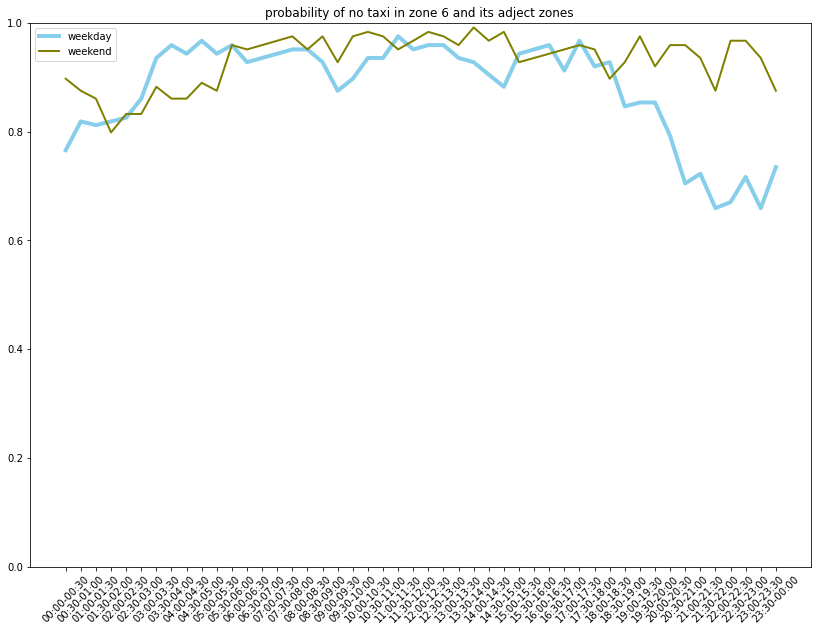

In [20]:
plot_zone_prob_no_taxi(6)

[0.32736921 0.37198978 0.38674102 0.41570568 0.50774406 0.51341712
 0.56427011 0.68538279 0.67780958 0.62361492 0.68920107 0.73263247
 0.67780958 0.63409559 0.60653066 0.61672421 0.61330747 0.58339611
 0.63409559 0.65195628 0.66291327 0.66660637 0.72857357 0.63409559
 0.68158567 0.64475241 0.64834434 0.68158567 0.70468809 0.73671398
 0.71653131 0.74909543 0.76592834 0.7963012  0.86070798 0.75326866
 0.7963012  0.65924063 0.60317039 0.60653066 0.55494355 0.60653066
 0.56114397 0.46198529 0.46455902 0.45434935 0.42741493 0.38246769]
[0.60990965 0.48567179 0.4803053  0.47499811 0.43219047 0.4134026
 0.41570568 0.4134026  0.37614605 0.44683961 0.58339611 0.63762815
 0.74494533 0.8007374  0.81419486 0.8007374  0.8007374  0.81873075
 0.82787849 0.81419486 0.72453716 0.71653131 0.73671398 0.74909543
 0.73671398 0.78313949 0.74909543 0.74494533 0.77880078 0.78750238
 0.82329192 0.78750238 0.84648172 0.75746513 0.82329192 0.73263247
 0.73671398 0.71256162 0.77880078 0.77448611 0.75746513 0.7963

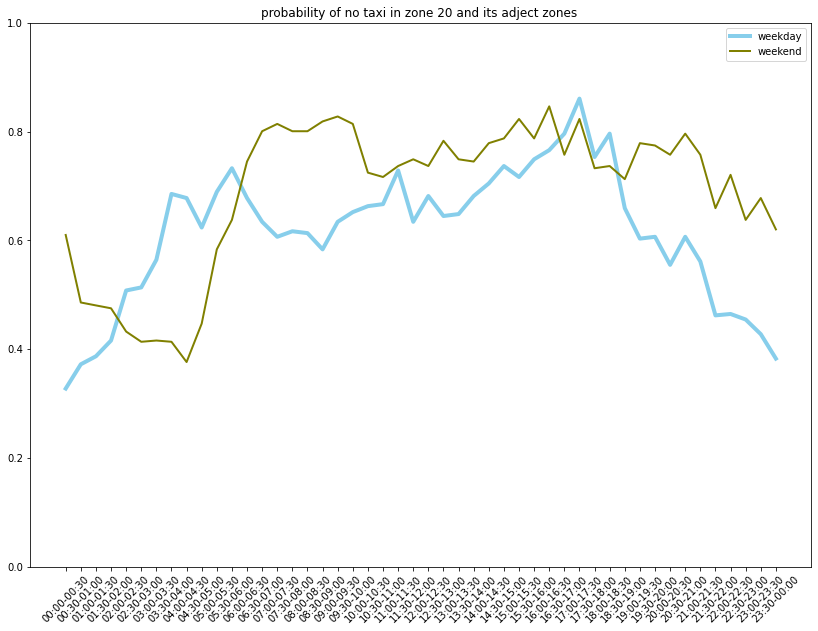

In [21]:
plot_zone_prob_no_taxi(20)

[0.00249533 0.00240549 0.00324708 0.01067341 0.02505538 0.04962139
 0.08235907 0.14611909 0.19204991 0.20055502 0.37656422 0.43027388
 0.47079462 0.47711392 0.50325078 0.48837747 0.47552618 0.44337767
 0.42457498 0.54154271 0.42035038 0.44932896 0.46301307 0.40656966
 0.40792715 0.36421898 0.38034876 0.35700696 0.30320888 0.30625618
 0.28842121 0.33176336 0.29621591 0.36059494 0.32627979 0.31348618
 0.26010584 0.19077383 0.13669543 0.08600642 0.07378007 0.05062381
 0.02824986 0.01240073 0.01005184 0.00669318 0.00428201 0.00194986]
[0.0674299  0.0383884  0.02229633 0.01789322 0.01690747 0.01724902
 0.0200405  0.02882055 0.03639466 0.06329177 0.15515459 0.33509764
 0.47236655 0.56552544 0.65486031 0.60049558 0.63975713 0.67255817
 0.59452055 0.59650559 0.62918287 0.55989837 0.54881164 0.51685133
 0.56741367 0.4965853  0.50493108 0.48351803 0.49493278 0.46922792
 0.45840601 0.48675226 0.47711392 0.49000811 0.44485807 0.45993658
 0.37782153 0.36179893 0.36665522 0.3407294  0.34761259 0.336

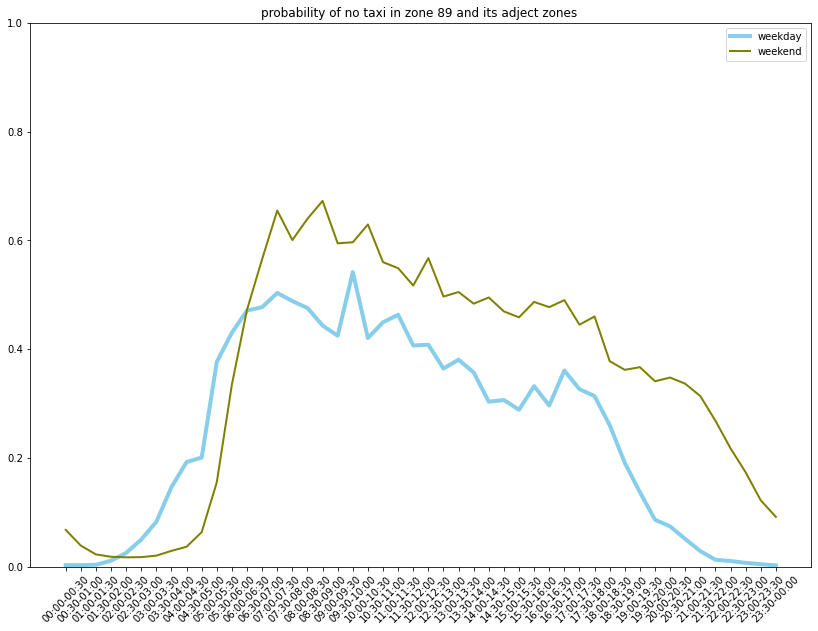

In [23]:
plot_zone_prob_no_taxi(89)

[9.14947229e-01 8.65502995e-01 8.65502995e-01 8.75173319e-01
 9.04837418e-01 8.75173319e-01 7.74486108e-01 5.24954102e-01
 3.01194212e-01 5.62596455e-02 1.18748408e-02 1.69889409e-03
 2.80100281e-03 5.33570993e-03 8.50869526e-03 3.48899814e-02
 4.26147196e-02 3.08759481e-02 3.37461518e-02 2.47235265e-02
 2.41801744e-02 1.43437002e-02 2.31290317e-02 1.16138659e-02
 2.13982862e-02 8.79709845e-03 1.18748408e-02 3.16514771e-03
 2.77005282e-03 1.47039792e-03 4.57886652e-04 3.54626851e-04
 9.63975726e-04 8.04888085e-03 1.77151808e-02 4.16781704e-02
 4.12176429e-02 3.94258600e-02 3.68831674e-02 7.26412583e-02
 2.01896518e-01 3.01194212e-01 4.34598209e-01 5.99828732e-01
 7.74486108e-01 8.27878488e-01 8.18730753e-01 8.55939523e-01]
[0.98895039 0.93550699 0.97802287 0.9672161  0.94595947 0.90483742
 0.91494723 0.76592834 0.54274748 0.37614605 0.21343041 0.13383988
 0.1266071  0.10598641 0.082085   0.15463826 0.14956862 0.13992249
 0.14628153 0.14306668 0.17669445 0.11844183 0.15292957 0.12245643

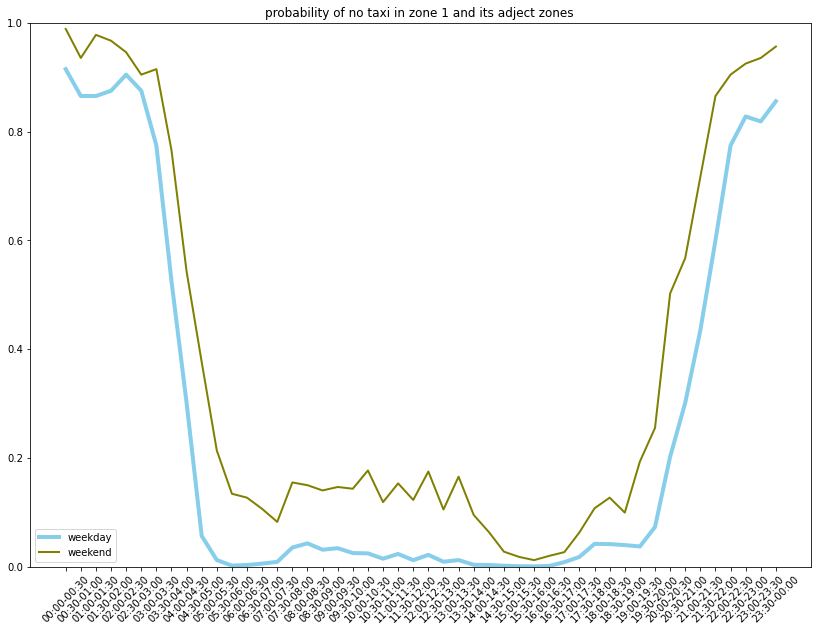

In [285]:
plot_zone_prob_no_taxi(1)

[2.17495925e-053 4.37208745e-042 1.52839697e-030 3.53791904e-022
 1.23443484e-017 4.58531116e-014 8.23535131e-011 1.36890901e-008
 4.60594293e-008 8.82947583e-007 3.96733923e-007 1.25475401e-013
 4.78284326e-020 2.93948247e-038 1.10682922e-047 2.00910766e-061
 1.87519338e-073 2.26680515e-069 1.50774648e-066 4.79719343e-065
 3.09293246e-068 1.64783125e-072 1.79432735e-074 6.20725536e-077
 2.52643051e-080 5.66876107e-078 5.30316557e-078 2.07692620e-079
 4.75237405e-082 5.62650340e-088 2.32427139e-089 1.32818650e-084
 3.48063695e-075 8.13183271e-068 2.64136778e-074 2.71940647e-093
 6.88908506e-107 1.96852729e-115 1.39543211e-116 2.45660957e-113
 3.84147616e-108 1.72491188e-100 1.60469105e-103 1.40228273e-105
 5.99805209e-105 3.81491036e-095 7.02155472e-086 1.40993218e-071]
[3.09713737e-35 2.15199793e-36 7.20344820e-34 1.29182547e-32
 4.33535956e-31 3.47542209e-28 2.23009064e-24 2.73200342e-20
 1.22623265e-17 8.42346375e-12 1.29446263e-07 6.43773793e-06
 1.70390975e-05 1.01411273e-08 9.199

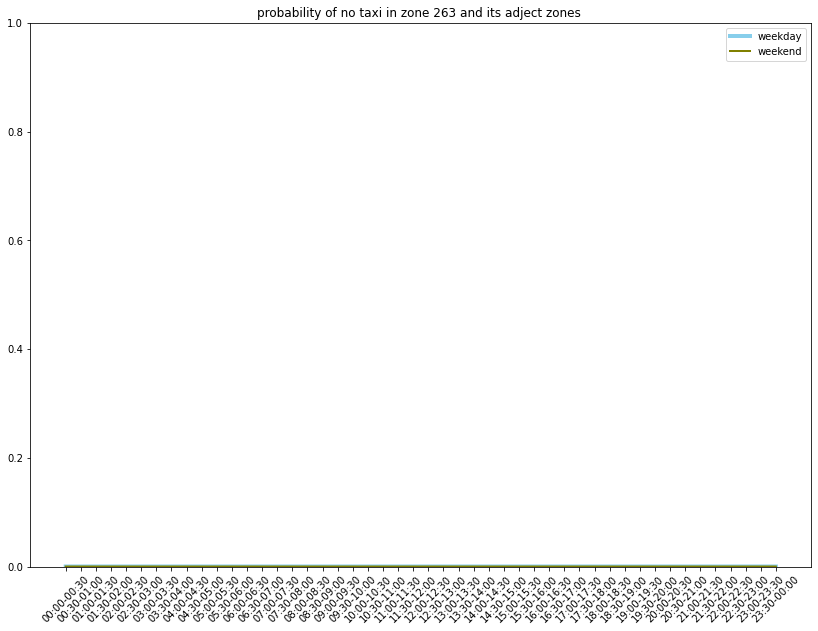

In [24]:
plot_zone_prob_no_taxi(263)